# Level 3

# Task1 - Predictive Modeling

# Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('Dataset.csv')

non_numeric_cols = df.select_dtypes(exclude=[float, int]).columns.tolist()
print("Columns with non-numeric values:")
print(non_numeric_cols)

df.drop(columns=non_numeric_cols, inplace=True)

X = df.drop(columns=['Aggregate rating']) 
y = df['Aggregate rating']



Columns with non-numeric values:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


# Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a regression model
def train_and_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [31]:
# Training and evaluating Linear Regression model
linear_regression = LinearRegression()
mse_lr, r2_lr = train_and_evaluate_model(linear_regression)

# Training and evaluating Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
mse_dt, r2_dt = train_and_evaluate_model(decision_tree)

# Training and evaluating Random Forest Regression model
random_forest = RandomForestRegressor()
mse_rf, r2_rf = train_and_evaluate_model(random_forest)

# Print the performance metrics
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")
print(f"Decision Tree Regression - MSE: {mse_dt:.2f}, R2 Score: {r2_dt:.2f}")
print(f"Random Forest Regression - MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")

Linear Regression - MSE: 1.58, R2 Score: 0.31
Decision Tree Regression - MSE: 0.15, R2 Score: 0.93
Random Forest Regression - MSE: 0.08, R2 Score: 0.97


# Task2 - Customer Preference Analysis


# Analyze the relationship between the type of 0cuisine and the restaurant's rating.

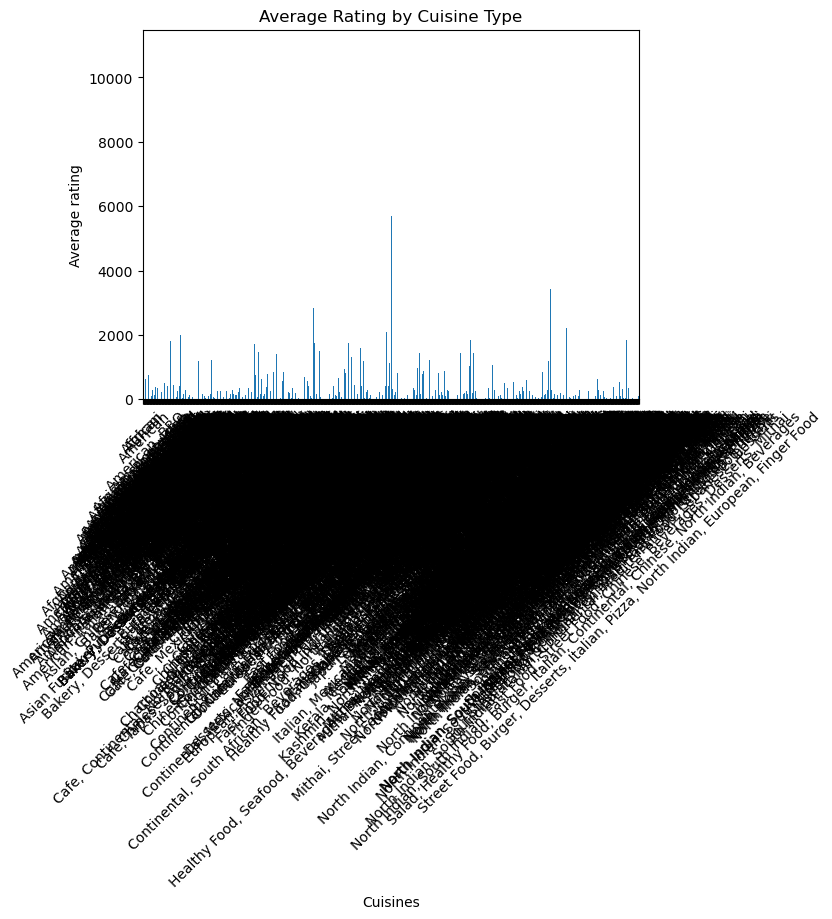

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset.csv')

# Analyzing the relationship between the type of cuisine and the restaurant's rating.
average_rating_by_cuisine = df.groupby('Cuisines')['Votes'].mean()

# Plot the average rating by cuisine
average_rating_by_cuisine.plot(kind='bar')
plt.xlabel('Cuisines')
plt.ylabel('Average rating')
plt.title('Average Rating by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

# Identify the most popular cuisines amongcustomers based on the number of votes.

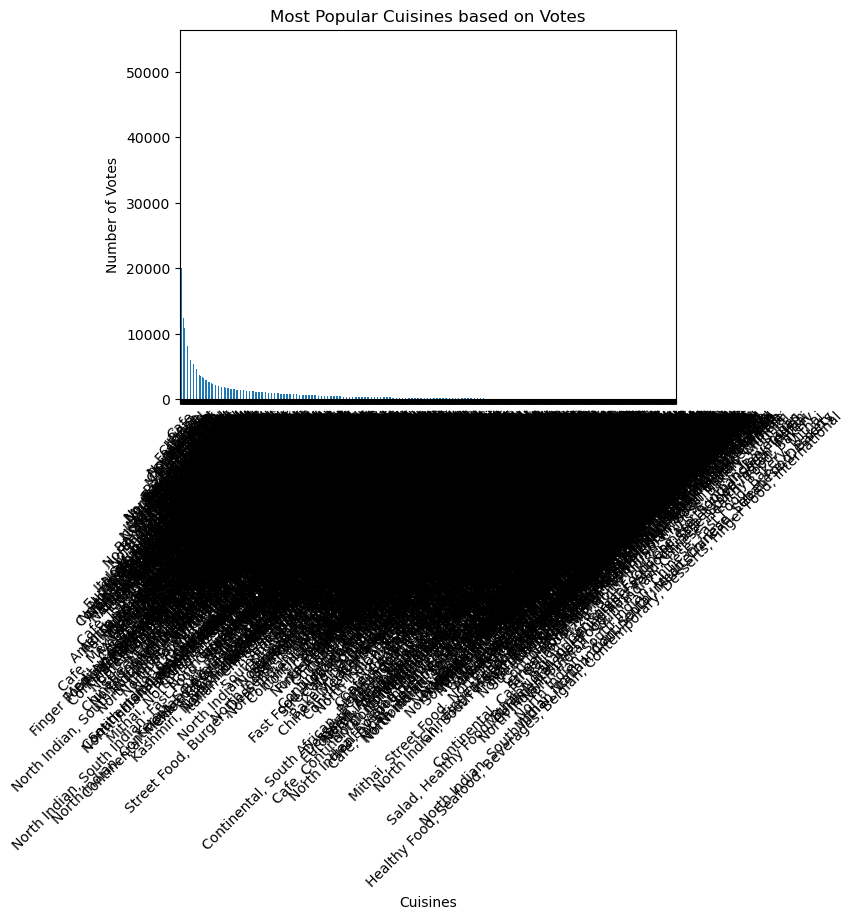

In [35]:
# Identifying the most popular cuisines among customers based on the number of votes.
most_popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Plot the number of votes by cuisine
most_popular_cuisines.plot(kind='bar')
plt.xlabel('Cuisines')
plt.ylabel('Number of Votes')
plt.title('Most Popular Cuisines based on Votes')
plt.xticks(rotation=45)
plt.show()

# Determine if there are any specific cuisines that tend to receive higher ratings.

In [37]:
# Determining if there are any specific cuisines that tend to receive higher ratings.
correlation_cuisine_rating_votes = df.groupby('Cuisines')['Rating text', 'Votes'].corr().iloc[0::2, -1]

# Filter cuisines with a positive correlation
higher_rated_cuisines = correlation_cuisine_rating_votes[correlation_cuisine_rating_votes > 0].index

print("Cuisines that tend to receive higher ratings: {', '.join(higher_rated_cuisines)}")

Cuisines that tend to receive higher ratings: {', '.join(higher_rated_cuisines)}


# Task3 - Data Visualization


# Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

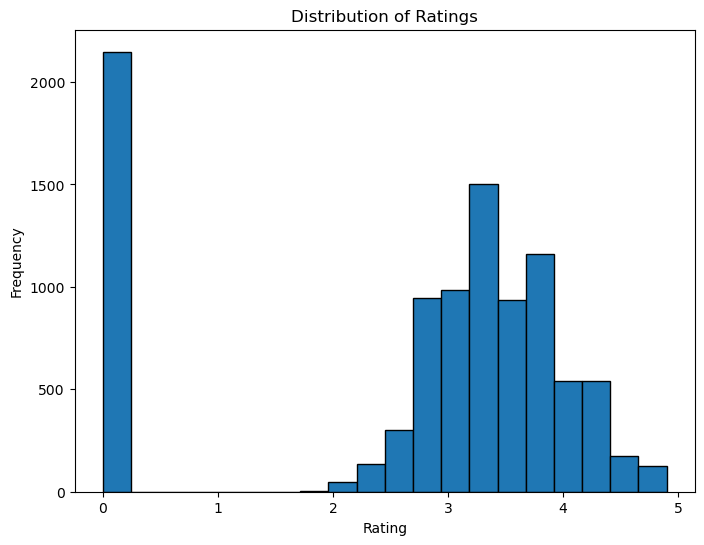

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset.csv')

# Distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Compare the average ratings of different cuisines or cities using appropriate visualizations.

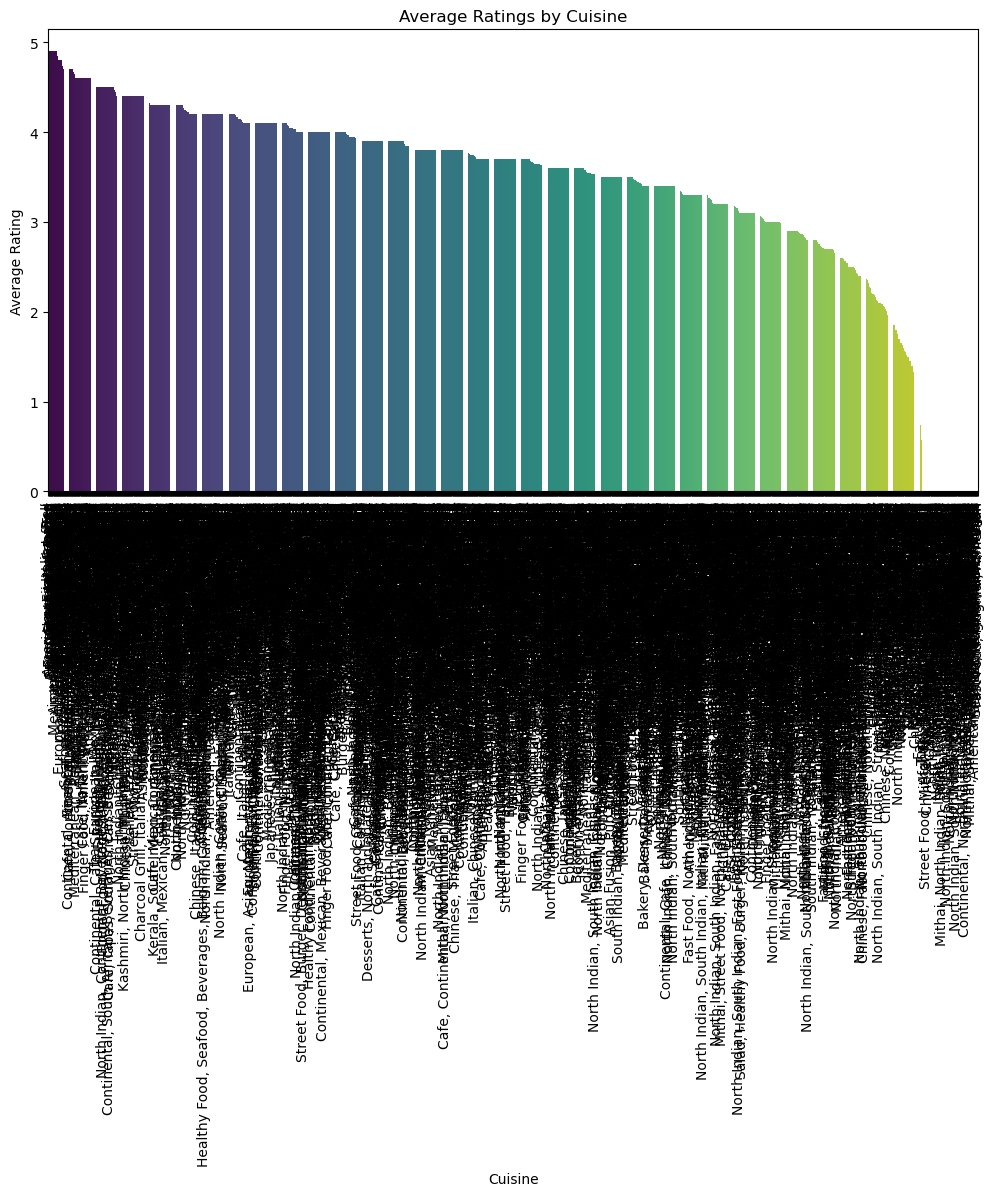

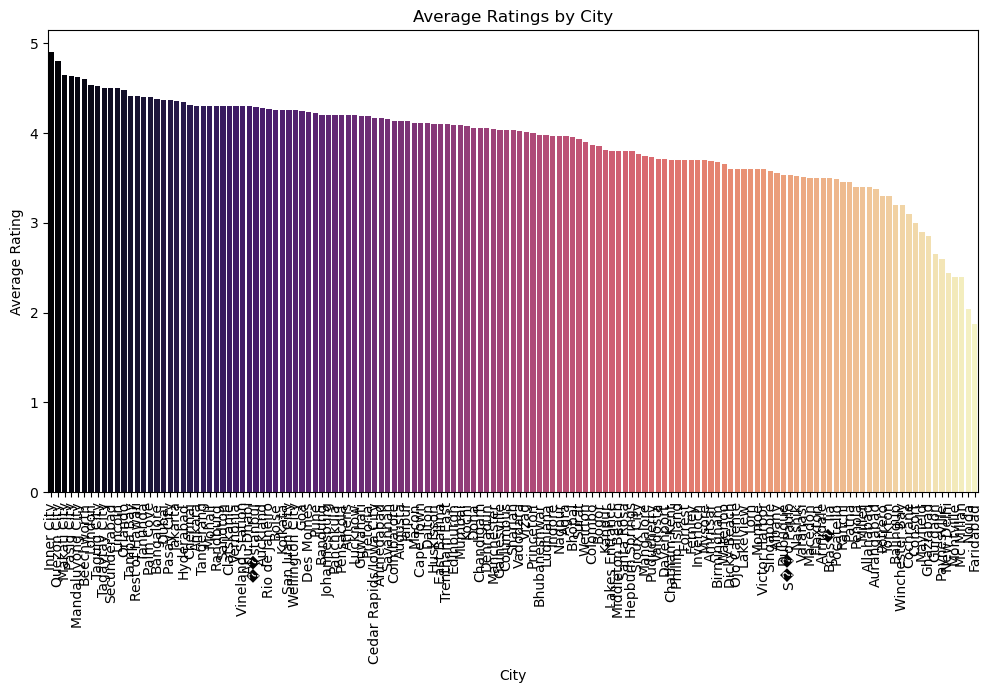

In [40]:
# Comparison of average ratings of different cuisines using a bar plot
plt.figure(figsize=(12, 6))
average_ratings_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_ratings_by_cuisine.index, y=average_ratings_by_cuisine.values, palette='viridis')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Cuisine')
plt.xticks(rotation=90)
plt.show()

# Comparison of average ratings of different cities using a bar plot
plt.figure(figsize=(12, 6))
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=average_ratings_by_city.index, y=average_ratings_by_city.values, palette='magma')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City')
plt.xticks(rotation=90)
plt.show()

# Visualize the relationship between various features and the target variable to gain insights.

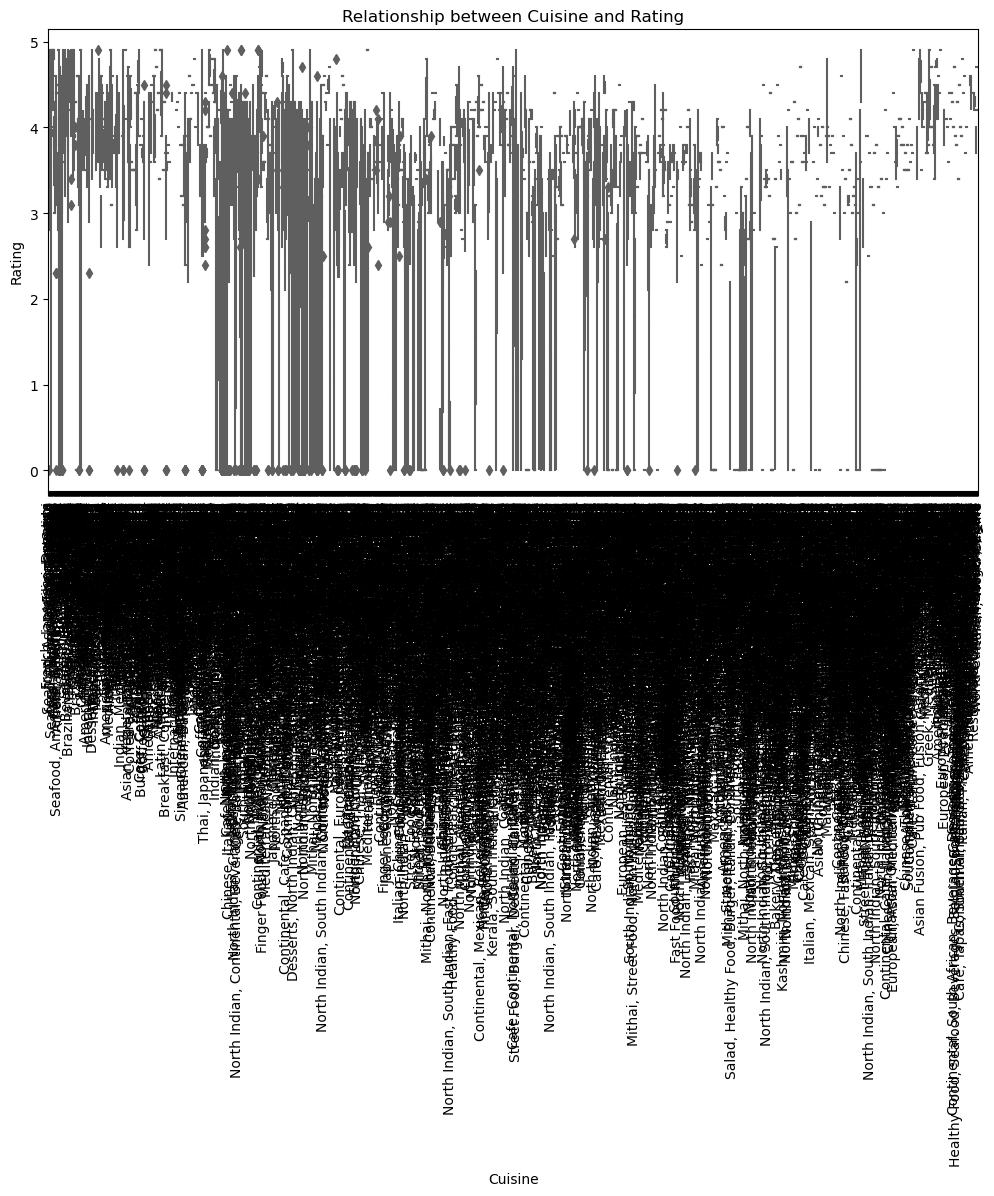

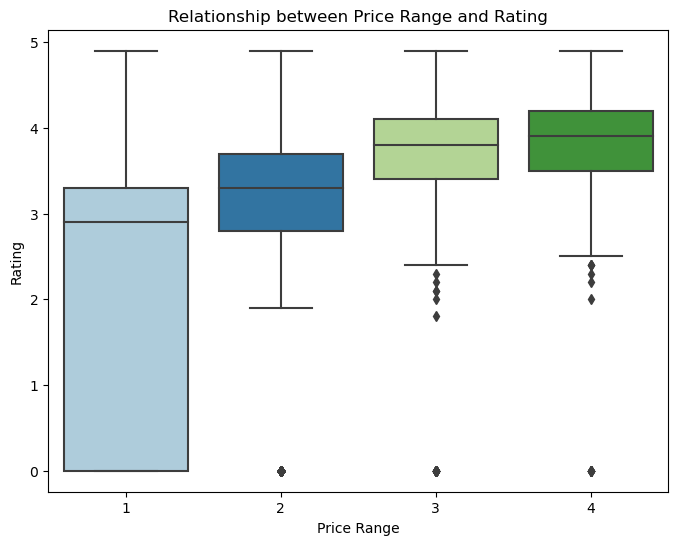

In [41]:
# Visualization of the relationship between various features and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df, palette='Set3')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('Relationship between Cuisine and Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Paired')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Relationship between Price Range and Rating')
plt.show()